In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("Car details v3.csv")

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.shape

(8128, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [9]:
df.isna().sum()/df.shape[0]

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026452
torque           0.027313
seats            0.027190
dtype: float64

In [10]:
# backup = df.copy()

In [11]:
df["mileage"] = df["mileage"].str.split(" ",expand = True)[0].astype(float)

In [12]:
df["engine"] = pd.to_numeric(df["engine"].str.split(" ",expand=True)[0])

In [13]:
df["max_power"] = pd.to_numeric(df["max_power"].str.split(" ",expand=True)[0])

In [14]:
df["manufacture"]=df["name"].str.split(" ",expand=True)[0]
df["model"] = df["name"].str.split(" ",expand=True)[1]
df.drop("name",axis=1, inplace=True)

In [15]:
df["seller_type"].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [16]:
df["fuel"].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [17]:
df["transmission"].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [18]:
df["owner"].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [19]:
df.drop("torque",axis=1,inplace=True)

In [20]:
df.dropna(inplace=True)

In [21]:
backup=df.copy()

In [22]:
X = df.drop("selling_price", axis=1)
y = df["selling_price"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
categorical_column = X.select_dtypes(include="object").columns.to_list()

In [25]:
numerical_column = X.select_dtypes(include="number").columns.to_list()

In [26]:
numerical_column

['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

In [27]:
transformer = ColumnTransformer([
    ("scale",StandardScaler(),numerical_column),
    ("encode",OneHotEncoder(handle_unknown="ignore",sparse=False), categorical_column)
])

pipe = Pipeline([("pipe",transformer)])

In [28]:
x_train_tran=pipe.fit_transform(x_train)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
model=LinearRegression()
model.fit(x_train_tran,y_train)

LinearRegression()

In [30]:
x_test_tran=pipe.transform(x_test)

In [31]:
pred=model.predict(x_test_tran)

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

-4736599818935528.0

## Decision Tree

In [33]:
model2 = DecisionTreeRegressor()
model2.fit(x_train_tran,y_train)
pred2=model2.predict(x_test_tran)
r2_score(y_test,pred2)

0.969087897195713

In [34]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mean_absolute_error(y_test,pred2)

72732.19353139486

## Random Forest

In [35]:
model3 = RandomForestRegressor()
model3.fit(x_train_tran,y_train)
pred3=model3.predict(x_test_tran)
r2_score(y_test,pred3)

0.9838219225024429

In [36]:
mean_absolute_error(y_test,pred3)

59100.98629714818

In [37]:
mean_absolute_percentage_error(y_test,pred3)

0.14122110746612834

## XGBoost

In [38]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train_tran,y_train)
pred4=xgb.predict(x_test_tran)
r2_score(y_test,pred4)

0.9851772735485677

In [39]:
mean_absolute_error(y_test,pred4)

60674.12582717683

## PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
aa = pca.fit_transform(x_train_tran)

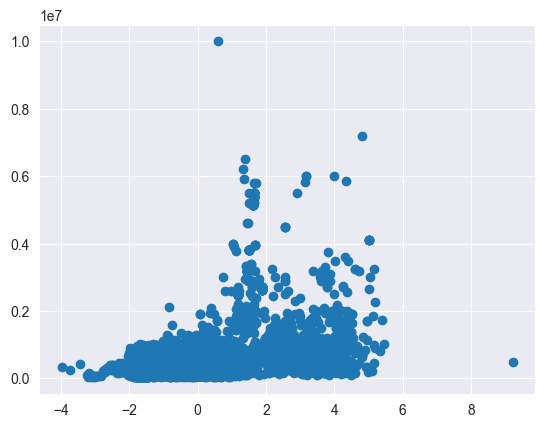

In [41]:
plt.scatter(x=aa[:,0],y=y_train)

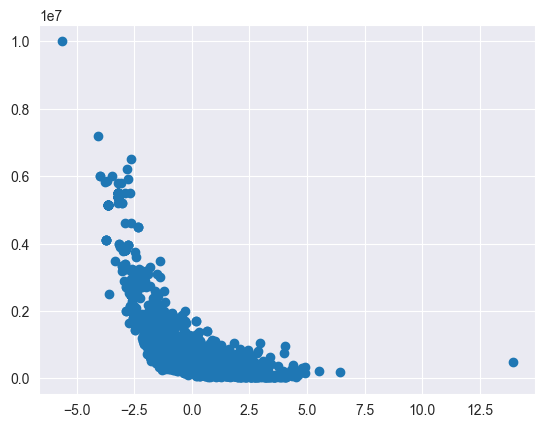

In [42]:
plt.scatter(x=aa[:,1],y=y_train)

In [43]:
aa[:,0]

array([-1.06685827, -0.14826606, -1.75112199, ...,  0.76209485,
        2.01813431, -0.76001738])

## Data cleaning

### Fuel

<Axes: xlabel='selling_price', ylabel='fuel'>

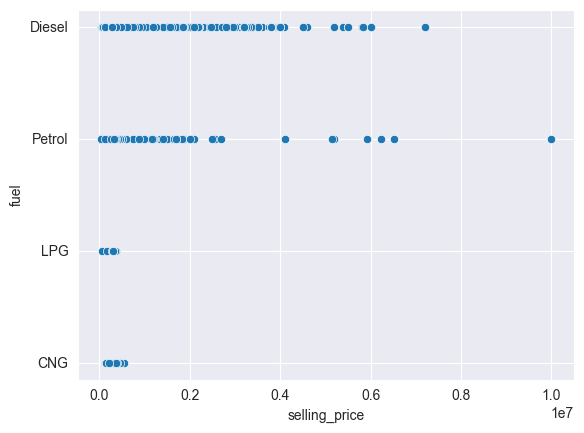

In [44]:
sns.scatterplot(df, x="selling_price",y='fuel')

<Axes: xlabel='fuel', ylabel='Count'>

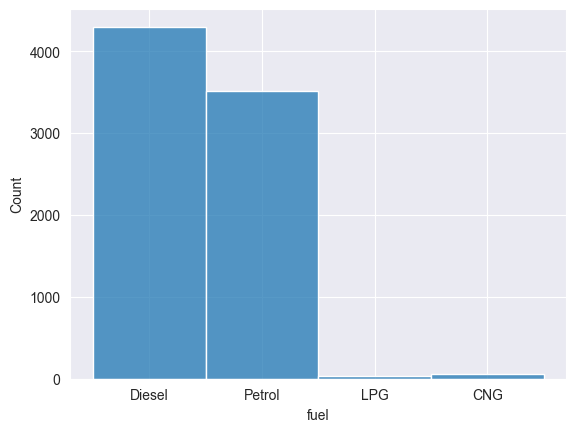

In [45]:
sns.histplot(df,x="fuel")

In [46]:
df["fuel"]=df["fuel"].replace(["LPG","CNG"],"other")

In [47]:
df = df[df['selling_price'] < 0.4e7]
df.shape

(7774, 13)

### Seller_type

<Axes: xlabel='selling_price', ylabel='seller_type'>

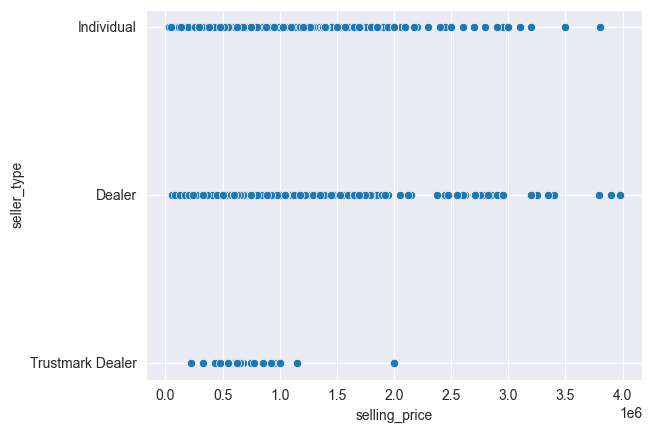

In [120]:
sns.scatterplot(df, x="selling_price",y="seller_type")

### Owner

<Axes: xlabel='selling_price', ylabel='owner'>

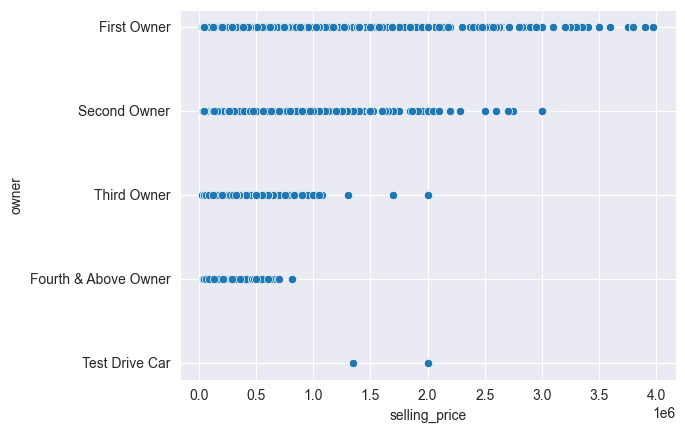

In [49]:
sns.scatterplot(df, x="selling_price",y="owner")

In [50]:
df = df[~(df["owner"]=="Test Drive Car")]
df["owner"]=df["owner"].replace(["Third Owner","Fourth & Above Owner"],"Third_and_Above")

### Transmission

<Axes: xlabel='selling_price', ylabel='transmission'>

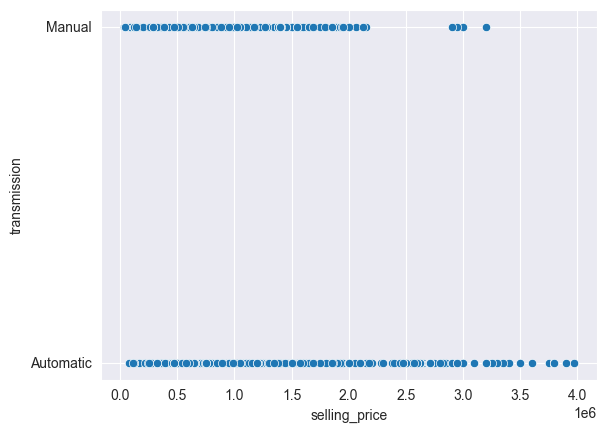

In [51]:
sns.scatterplot(df,x="selling_price", y="transmission")

In [53]:
#extracting no.of year from registration to 2023
df["no_year"]=2023-df["year"]
df = df.drop("year", axis=1)

In [54]:
df.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,no_year
count,7.772000e+03,7.772000e+03,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000
mean,5.699702e+05,7.012025e+04,19.446666,1444.667010,89.618781,5.422928,9.098044
std,5.357604e+05,5.681673e+04,4.031594,493.294863,32.418739,0.964085,3.844709
min,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000,3.000000
25%,2.650000e+05,3.500000e+04,16.800000,1197.000000,68.050000,5.000000,6.000000
50%,4.500000e+05,6.000000e+04,19.330000,1248.000000,82.000000,5.000000,8.000000
75%,6.700000e+05,9.800000e+04,22.320000,1499.000000,100.600000,5.000000,11.000000
max,3.975000e+06,2.360457e+06,33.440000,3498.000000,272.000000,14.000000,29.000000


In [55]:
# sns.heatmap(df.corr(), annot=True)

## Numerical Columns

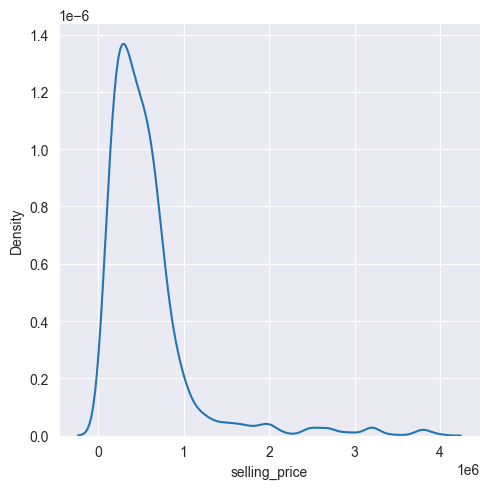

In [56]:
sns.displot(df["selling_price"], kind="kde")

### Km_driven

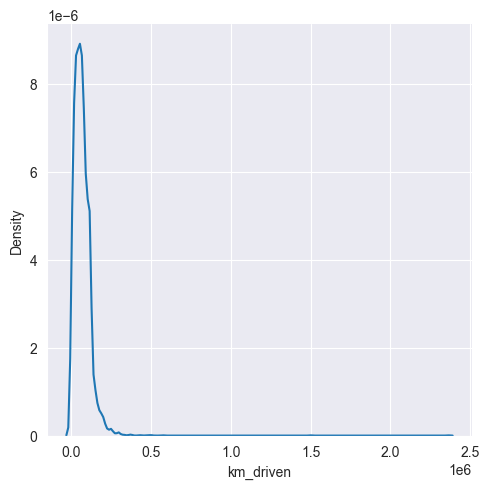

In [57]:
sns.displot(df['km_driven'], kind="kde")

<Axes: xlabel='km_driven', ylabel='selling_price'>

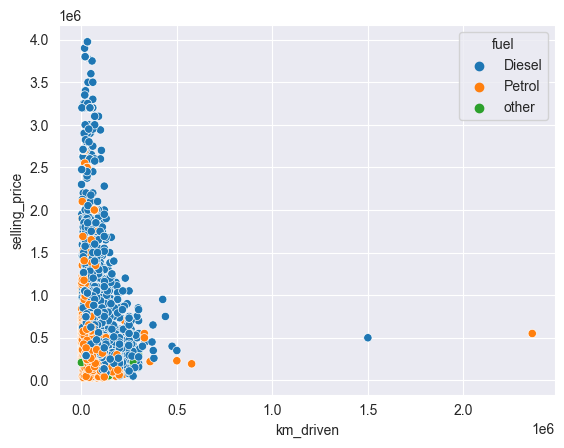

In [58]:
sns.scatterplot(df,x="km_driven", y="selling_price",hue="fuel")

In [59]:
df = df[~(df["km_driven"] >0.5e6)]

<Axes: xlabel='km_driven', ylabel='selling_price'>

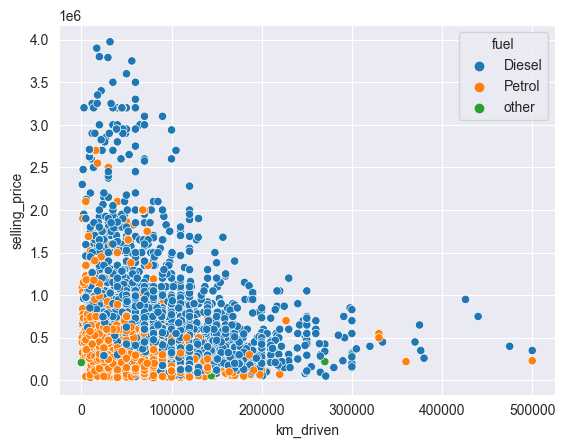

In [60]:
# km_driven
sns.scatterplot(df,x="km_driven", y="selling_price",hue="fuel")

### Engine

<Axes: xlabel='engine', ylabel='selling_price'>

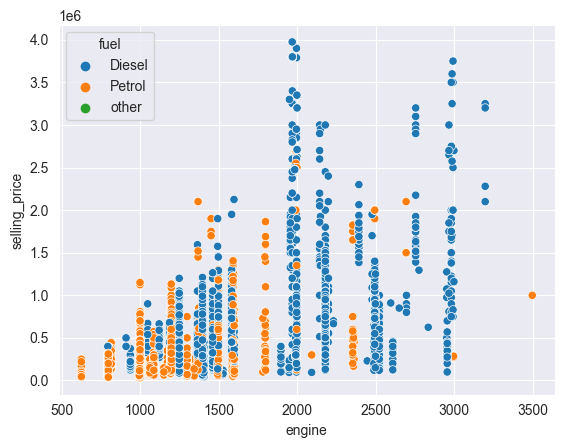

In [61]:
sns.scatterplot(df,x="engine", y="selling_price",hue="fuel")

In [62]:
# removing engine > 3000
df = df[~(df["engine"]>3000)]

<Axes: xlabel='engine', ylabel='selling_price'>

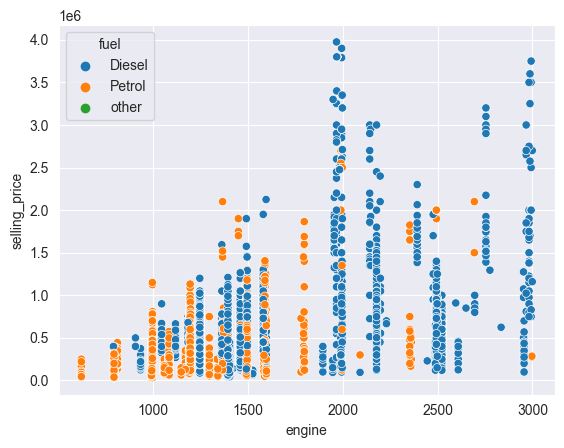

In [63]:
sns.scatterplot(df,x="engine", y="selling_price",hue="fuel")

### Seats

<Axes: xlabel='seats', ylabel='selling_price'>

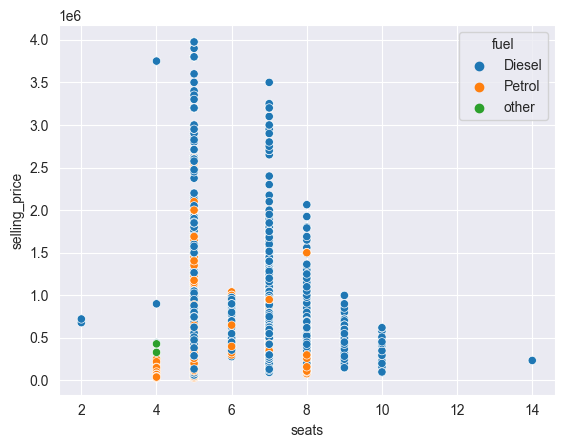

In [64]:
sns.scatterplot(df,x="seats", y="selling_price",hue="fuel")

In [65]:
# removing seats less than 4 and greater than 10
df=df[~((df["seats"] < 4) | (df["seats"] > 10))]

<Axes: xlabel='seats', ylabel='selling_price'>

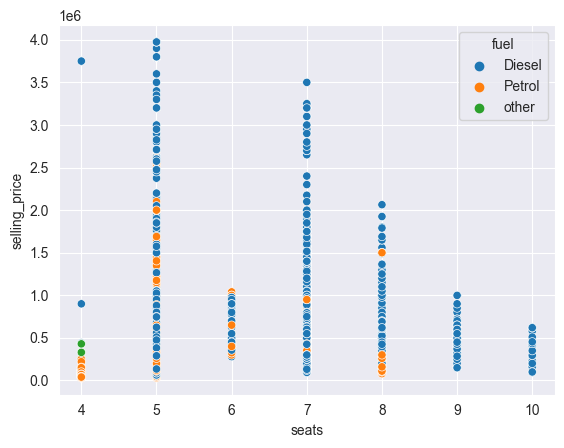

In [66]:
sns.scatterplot(df,x="seats", y="selling_price",hue="fuel")

### Max_power

<Axes: xlabel='max_power', ylabel='selling_price'>

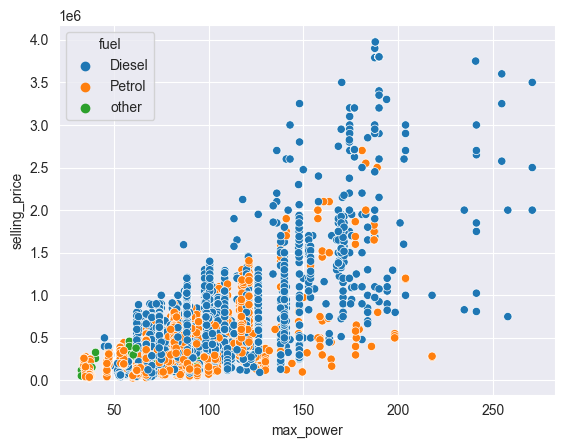

In [67]:
sns.scatterplot(df,x="max_power", y="selling_price",hue="fuel")

In [68]:
# removing max_power less than 30 and greater than 200
df = df[~((df["max_power"]<30) | (df["max_power"]>200))]
df.shape

(7725, 13)

### mileage

<Axes: xlabel='mileage', ylabel='selling_price'>

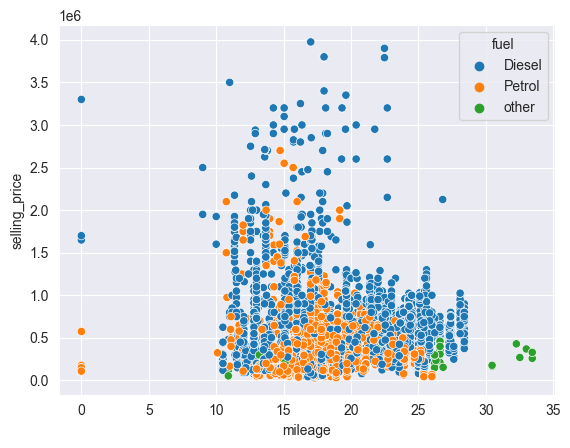

In [69]:
sns.scatterplot(df,x="mileage", y="selling_price",hue="fuel")

In [70]:
df = df[~((df["mileage"]<10) | (df["mileage"]>200))]

<Axes: xlabel='mileage', ylabel='selling_price'>

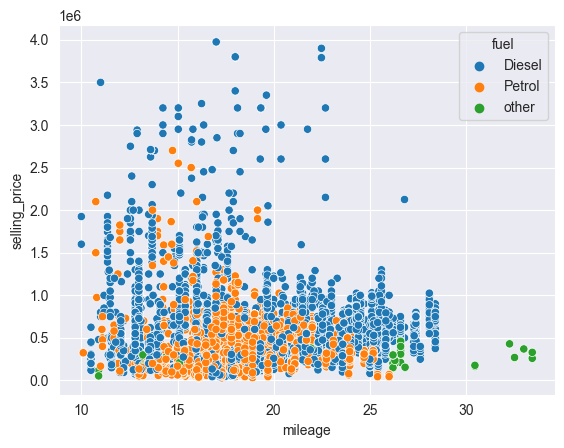

In [71]:
# mielage
sns.scatterplot(df,x="mileage", y="selling_price",hue="fuel")

### no_year

<Axes: xlabel='no_year', ylabel='selling_price'>

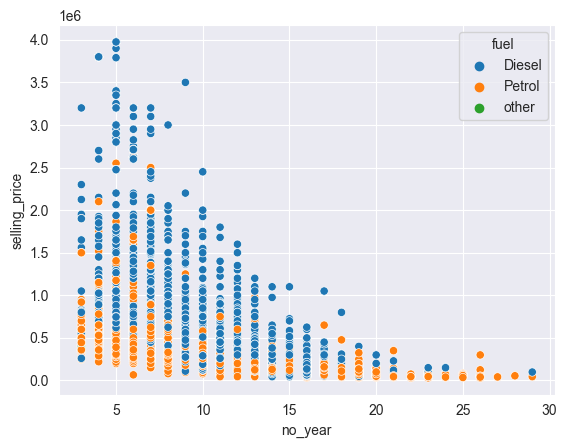

In [72]:
sns.scatterplot(df,x="no_year", y="selling_price",hue="fuel")

In [73]:
df = df[~((df["no_year"]>25))]

<Axes: xlabel='no_year', ylabel='selling_price'>

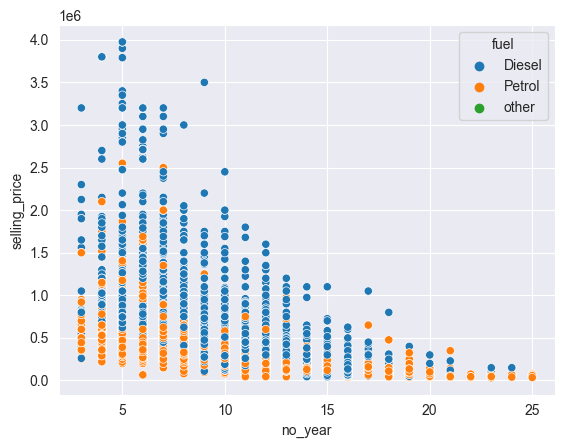

In [74]:
sns.scatterplot(df,x="no_year", y="selling_price",hue="fuel")

## Model Training

In [75]:
X = df.drop("selling_price", axis=1)
y = df["selling_price"]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
categorical_column = X.select_dtypes(include="object").columns.to_list()

In [78]:
numerical_column = X.select_dtypes(include="number").columns.to_list()

In [79]:
transformer = ColumnTransformer([
    ("scale",StandardScaler(),numerical_column),
    ("encode",OneHotEncoder(handle_unknown="ignore",sparse=False), categorical_column)
])

pipe = Pipeline([("pipe",transformer)])

In [80]:
x_train_tran=pipe.fit_transform(x_train)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Linear Regression

In [81]:
model=LinearRegression()
model.fit(x_train_tran,y_train)

LinearRegression()

In [82]:
x_test_tran=pipe.transform(x_test)

In [83]:
pred=model.predict(x_test_tran)

In [84]:
r2_score(y_test,pred)

-2.1094289006942908e+16

## Decision Tree

In [85]:
model2 = DecisionTreeRegressor()
model2.fit(x_train_tran,y_train)
pred2=model2.predict(x_test_tran)
r2_score(y_test,pred2)

0.927486287969294

In [86]:
mean_absolute_error(y_test,pred2)

75069.84841888673

In [87]:
r2_score(y_test,pred2)

0.927486287969294

## Random Forest

In [88]:
model3 = RandomForestRegressor()
model3.fit(x_train_tran,y_train)
pred3=model3.predict(x_test_tran)
r2_score(y_test,pred3)

0.9486016207192853

In [89]:
mean_absolute_error(y_test,pred3)

63223.370575856214

In [90]:
r2_score(y_test,pred3)

0.9486016207192853

## XGBoost

In [91]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train_tran,y_train)
pred4=xgb.predict(x_test_tran)
r2_score(y_test,pred4)

0.9538983924663631

## Finalize model 

In [93]:
backup.to_csv("process_car_data.csv",index=False)

In [94]:
X = backup.drop("selling_price", axis=1)
y = backup["selling_price"]

In [95]:
categorical_column = X.select_dtypes(include="object").columns.to_list()
numerical_column = X.select_dtypes(include="number").columns.to_list()

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
transformer = ColumnTransformer([
    ("scale",StandardScaler(),numerical_column),
    ("encode",OneHotEncoder(handle_unknown="ignore",sparse=False), categorical_column)
])

# pipe = Pipeline([("pipe",transformer)])

In [98]:
xgb = XGBRegressor()

In [99]:
pipe = Pipeline([("transform",transformer),
                ("model",xgb)
                ])

In [103]:
pipe.fit(x_train, y_train)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['year', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power', 'seats']),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner',
                                                   'manufacture', 'model'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              co...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [104]:
y_pred=pipe.predict(x_test)

In [105]:
r2_score(y_test,y_pred)

0.9851772735485677

In [106]:
import pickle

In [107]:
pickle.dump(pipe,open("car_prediction.pkl","wb"))

In [108]:
pipe.predict(pd.DataFrame([[2006,62900,'Petrol',"Individual","Manual","First Owner",18.90,998.0,67.10,5.0,"Maruti","Wagon"]],columns=x_train.columns))

array([143079.58], dtype=float32)